In [3]:
from pandas import read_csv

with open('db_center.csv', encoding = 'UTF-8') as f:
    names = ['formula', 'db_center', 'ad_energy']
    data = read_csv(f, names = names)
data

formula  db_center  ad_energy
0  Cu12Co      -1.33     -0.547
1  Cu12Rh      -1.57     -0.591
2  Cu12Ir      -1.74     -0.420
3  Cu12Ni      -1.21     -0.674
4  Cu12Pd      -2.01     -0.500
5  Cu12Pt      -1.78     -0.391
6    Cu13      -2.33     -0.316
7  Cu12Ag      -4.13     -0.201
8  Cu12Au      -3.12     -0.298

In [16]:
from pandas import read_csv

with open('db_center.csv', encoding = 'UTF-8') as f:
    data = read_csv(f, names = ['formula', 'db_center', 'ad_energy'])
data

formula  db_center  ad_energy
0  Cu12Co      -1.33     -0.547
1  Cu12Rh      -1.57     -0.591
2  Cu12Ir      -1.74     -0.420
3  Cu12Ni      -1.21     -0.674
4  Cu12Pd      -2.01     -0.500
5  Cu12Pt      -1.78     -0.391
6    Cu13      -2.33     -0.316
7  Cu12Ag      -4.13     -0.201
8  Cu12Au      -3.12     -0.298

In [19]:
X = data['db_center'].values.reshape(-1,1)   #这里必须转成列向量，因为实际上更普遍的情况是：X是多维的数组。一行就是一个数组
y = data['ad_energy'].values  #.values是把数据转成一个数组
print(X)
print(y)

[[-1.33]
 [-1.57]
 [-1.74]
 [-1.21]
 [-2.01]
 [-1.78]
 [-2.33]
 [-4.13]
 [-3.12]]
[-0.547 -0.591 -0.42  -0.674 -0.5   -0.391 -0.316 -0.201 -0.298]


In [18]:
from sklearn.linear_model import LinearRegression  #做线性回归
from sklearn.metrics import mean_squared_error   #求R^2的算法

Ir = LinearRegression()  #告诉程序我要做一个线性回归的模型

Ir.fit(X, y)  #对X和y进行拟合

LinearRegression()

In [7]:
predicts1 = Ir.predict([[-2.3]])   #预测一个新的X值，X=[[-2.2]],即输入值也是数组
predicts2 = Ir.predict(X) 
print('predict = ' + str(predicts1))
print('predict = ' + str(predicts2))

predict = [-0.41416986]
predict = [-0.55211386 -0.51798338 -0.49380763 -0.56917909 -0.45541085 -0.48811922
 -0.40990355 -0.153925   -0.29755741]


In [9]:
r2 = Ir.score(X, y)  #计算r2，均方差
print('r2 = ' + str(r2))

r2 = 0.7646612597264623


In [10]:
coef = Ir.coef_  #输出斜率| 结果是数组，因为多元线性回归的斜率就是有多个，看ppt
intercept = Ir.intercept_  #输出截距
print(coef, intercept)
print('y = ' + str(coef[0]) + 'x' + str(intercept))

[-0.14221031] -0.7412535628655477
y = -0.14221030519198377x-0.7412535628655477


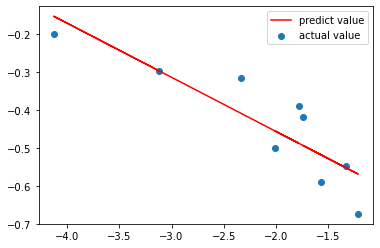

In [12]:
import matplotlib.pyplot as plt

x0 = data['db_center'].values.reshape(-1,1)   #这里必须转成列向量，因为实际上更普遍的情况是：X是多维的数组。一行就是一个数组
y0 = data['ad_energy'].values  #.values是把数据转成一个数组

plt.scatter(x0, y0, label = 'actual value')  
plt.plot(x0, Ir.predict(X), color= 'r', label = 'predict value')
plt.legend()  #显示右上角的标签
plt.show()

非线性回归
非线性回归
非线性回归
非线性回归
非线性回归